# This is a Linear based life prediction model using Scikit-Learn

## Setup

In [1]:
# For python 2 and python 3 compatibility
from __future__ import division, print_function, unicode_literals

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os

In [3]:
# Generate a pesudo-random number to produce a stable output across all runs
rng = np.random.seed(50)

In [4]:
# Configure plot figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [5]:
# Helper function to save figures
save_dir = "figures/"
# create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
# path to save the image file
def save_fig(fig_id, tight_layout='True'):
    path = os.path.join(save_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

## Load and Prepare Life Satisfaction Data

In [6]:
# Download CSV data from http://stats.oecd.org/index.aspx?DataSetCode=BLI
datapath = "datasets/lifestat/"

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

In [7]:
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN


In [8]:
# Remove duplicate entries and reshape the dataframe
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]

In [9]:
# Reshape data based on column values to produce a pivot table
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')

In [10]:
oecd_bli.head(3)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9


In [11]:
# print all the column names of the dataframe
list(oecd_bli)

['Air pollution',
 'Assault rate',
 'Consultation on rule-making',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net financial wealth',
 'Housing expenditure',
 'Job security',
 'Life expectancy',
 'Life satisfaction',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']

In [12]:
# Check 'Life Satisfaction' scores
oecd_bli['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [13]:
# Check Unemployment rates
oecd_bli['Long-term unemployment rate'].head()

Country
Australia    1.08
Austria      1.19
Belgium      3.88
Brazil       1.97
Canada       0.90
Name: Long-term unemployment rate, dtype: float64

## Load and Prepare GDP per capita Data

In [14]:
# Download CSV data from http://stats.oecd.org/index.aspx?DataSetCode=BLI

# To resolve parsing error related to tokenizing the data, use additional arguments
# use latin encoding as utf-8 encoding fails to decode the data
# identify the NA values

gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [15]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [16]:
# Rename the column '2015' to 'GDP per capita', and return a new dataframe using inplace
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

In [17]:
# Set the column label 'Country' as the index label of the dataframe
gdp_per_capita.set_index("Country", inplace=True)

In [18]:
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


## Merge the Datasets

In [19]:
# Merge the two dataframe objects
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)

In [20]:
# Sort the countries by their GDP per capita
full_country_stats.sort_values(by='GDP per capita', inplace=True)

In [21]:
full_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


In [22]:
# Example1: Find the GDP per capita and life satisfaction for United Kingdom
full_country_stats[['GDP per capita', 'Life satisfaction']].loc['United Kingdom']

GDP per capita       43770.688
Life satisfaction        6.800
Name: United Kingdom, dtype: float64

In [23]:
# Example2: United States
full_country_stats[['GDP per capita', 'Life satisfaction']].loc['United States']

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [24]:
# Example3: China
full_country_stats[['GDP per capita', 'Life satisfaction']].loc['Germany']

GDP per capita       40996.511
Life satisfaction        7.000
Name: Germany, dtype: float64

## Prepare Data for Visualization

In [25]:
# List all the countries
full_country_stats.index.values

array(['Brazil', 'Mexico', 'Russia', 'Turkey', 'Hungary', 'Poland',
       'Chile', 'Slovak Republic', 'Czech Republic', 'Estonia', 'Greece',
       'Portugal', 'Slovenia', 'Spain', 'Korea', 'Italy', 'Japan',
       'Israel', 'New Zealand', 'France', 'Belgium', 'Germany', 'Finland',
       'Canada', 'Netherlands', 'Austria', 'United Kingdom', 'Sweden',
       'Iceland', 'Australia', 'Ireland', 'Denmark', 'United States',
       'Norway', 'Switzerland', 'Luxembourg'], dtype=object)

In [26]:
# Remove the indices of the countries not required for comparison
# - Brazil, Mexico, Chile, Czech Republic, Norway, Switzerland, Luxembourg
remove_indices = [0, 1, 6, 8, 33, 34, 35]

In [27]:
# Keep the indices for comparison: total indices - removed indices
keep_indices = list(set(range(36)) - set(remove_indices))

In [28]:
# Create a new dataframe containing the list of keep_indices, and their GDP per capita and Life satisfaction
sample_data = full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

In [29]:
sample_data.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [30]:
# Create a new dataframe containing the list of remove_indices, and their GDP per capita and Life satisfaction
missing_data = full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[remove_indices]

In [31]:
missing_data.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4


## Data Visualization

Saving figure life_satisfaction_vs_gdp_scatterplot


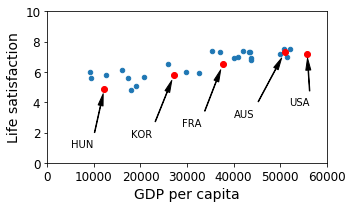

In [32]:
# Generate a scatter plot of the dataset with the keep_indices
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))

# Generate an empty plot with a max value of 60000 for x-axis and 10 for y-axis
# x_min = 0, x_max = 60000, y_min = 0, y_max = 10
plt.axis([0, 60000, 0, 10])

# ----Plot the data for few countries from the sample_data dataset----

# Create a dict containing a list of the countries that are being compared
position_text = {
    "Hungary": (5000, 1), 
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

for country, pos_text in position_text.items():
    
    # get the x and y coordinates for each country
    pos_data_x, pos_data_y = sample_data.loc[country]
    
    # rename the countries to their country code to save space in the plot graph
    country = "HUN" if country == "Hungary" else country
    country = "KOR" if country == "Korea" else country
    country = "FRA" if country == "France" else country
    country = "AUS" if country == "Australia" else country
    country = "USA" if country == "United States" else country
    
    # annotate the point 'xy' with the country code
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, 
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    
    # plot the data points using red circle "ro" markers
    plt.plot(pos_data_x, pos_data_y, "ro")
    
# save the plot as a figure
save_fig('life_satisfaction_vs_gdp_scatterplot')

# Display the plot
plt.show()

In [33]:
# Save the sample_data dataframe to csv
sample_data.to_csv('datasets/life_satisfaction_vs_gdp_per_capita.csv')

In [34]:
# list the contents of the new dataframe as a list
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
France,37675.006,6.5
United States,55805.204,7.2
Australia,50961.865,7.3
Hungary,12239.894,4.9
Korea,27195.197,5.8


## Tweaking Model Parameters

Saving figure tweaking_model_params_plot


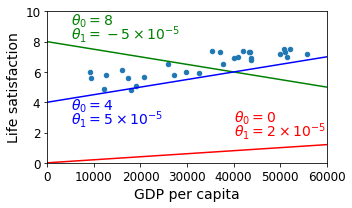

In [35]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 60000, 0, 10])

# create a list of evenly spaced numbers over a specified interval (1000 here)
# start = 0, end = 60000, interval = 1000
X = np.linspace(0, 60000, 1000)

# Plot the lines
# Add texts to the axes using regular expressions. e.g: "$\theta$" generates the theta symbol
plt.plot(X, 2*X/(10**5), "r")
plt.text(4*10**4, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(4*10**4, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

plt.plot(X, 8-5*X/(10**5), "g")
plt.text(5*10**3, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5*10**3, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

plt.plot(X, 4+5*X/(10**5), "b")
plt.text(5*10**3, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5*10**3, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

# save the plot as a figure
save_fig("tweaking_model_params_plot")

plt.show()

## Linear Model Prediction

In [36]:
# import sklearn
from sklearn import linear_model

In [37]:
# Create a Linear Regression model
lin_reg = linear_model.LinearRegression()

In [38]:
# Concatenate the sliced object 'GDP per capita' along the second axis and use it as the input
X_sample = np.c_[sample_data['GDP per capita']]

In [39]:
# Concatenate the sliced object 'Life satisfaction' and use it as the output
y_sample = np.c_[sample_data['Life satisfaction']]

In [40]:
# Fit the linear model
# X = X_sample
# y = y_sample
lin_reg.fit(X_sample, y_sample)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Find the intercept (y-intercept) and the coefficient (slope of the line)
intercept_, coeff_ = lin_reg.intercept_[0], lin_reg.coef_[0][0]

In [42]:
print(intercept_, coeff_)

4.85305280027 4.91154458916e-05


## Plot the Linear Model

Saving figure best_fit_model_plot


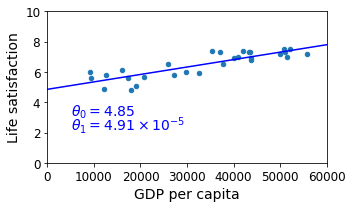

In [43]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)

# plot the input and the output
# linear regression equation: y = a + mx
plt.plot(X, intercept_+coeff_*X, "b")

plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

save_fig("best_fit_model_plot")

plt.show()

## Prediction Model for Cyprus

In [44]:
# Retrieve the GDP per capita for Cyprus
cyprus_gdp_per_data = gdp_per_capita.loc["Cyprus"]["GDP per capita"]

In [45]:
print(cyprus_gdp_per_data)

22587.49


In [46]:
# predict the life satisfaction for Cyprus using linear model
cyprus_predicted_life_satisfaction = lin_reg.predict(cyprus_gdp_per_data)[0][0]

In [47]:
print(cyprus_predicted_life_satisfaction)

5.96244744319


###  Plot the Prediction Model for Cyprus

Saving figure cyprus_prediction_plot


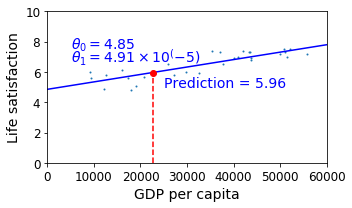

In [48]:
sample_data.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(5, 3), s=1) # s represents the dot size

X = np.linspace(0, 60000, 1000)

# plot the linear regression equation
plt.plot(X, intercept_ + coeff_*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^(-5)$", fontsize=14, color="b")

plt.plot([cyprus_gdp_per_data, cyprus_gdp_per_data], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")

plt.plot(cyprus_gdp_per_data, cyprus_predicted_life_satisfaction, "ro")

save_fig('cyprus_prediction_plot')
plt.show()

In [49]:
# Create a backup
backup = oecd_bli, gdp_per_capita

In [50]:
# Helper function to load the backup data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [51]:
# Helper function to print the missing data
def display_missing_data():
    return missing_data

In [52]:
# Helper function to retrieve sample data
def get_sample_data():
    return sample_data

In [53]:
# Helper function to retrieve intercept and slope values
def get_intercept_slope():
    return intercept_, coeff_